## 2D 数据类别划分（KNN 模型）

- 采用KNN算法实现2D数据自动聚类，预测V1=80,V2=60数据类别；
- 计算预测准确率，完成结果矫正
- 与 K-Means 和 Meanshift 对比，

数据：clustring/2d_data.csv

### 加载数据，观察数据中的两个维度是V1 和 V2，以及结果 labels

In [36]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('../dataset/clustering/2d_data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


### 分别设置特征数据 X 和 对应的结果数据 y

In [37]:
# define x and y
X = data.drop(['labels'], axis = 1)
y = data.loc[:, 'labels']
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


### 计算分类类别的计数，显示的通知 K-Means 算法有3个分类

分类0 有890个，分类1 有954个，分类2 有1156个

In [38]:
pd.Series(y).value_counts()

labels
2    1156
1     954
0     890
Name: count, dtype: int64

### 通过散点图观察三个分类的分布，每个群组（簇）的形状是凸的

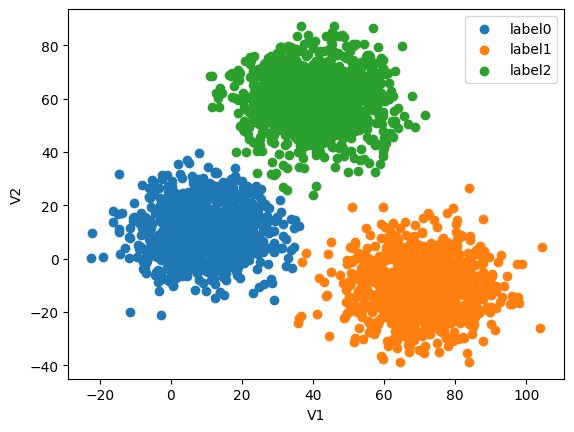

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2

fig1 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][mask0], X.loc[:, 'V2'][mask0])
label1 = plt.scatter(X.loc[:, 'V1'][mask1], X.loc[:, 'V2'][mask1])
label2 = plt.scatter(X.loc[:, 'V1'][mask2], X.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.show()

## 使用 KNN模型，监督学习，需要数据标注结果

### 创建 KNN 的模型实例，指定分类数量是 3，并训练

In [40]:
# establish a KNN model
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X, y).get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

### 预测[80, 60]的结果是 2, 评估的 accuracy 是 1.0，效果不错

In [41]:
# predict based on the test data V1=80, V2=60

y_predict_knn_test = KNN.predict(pd.DataFrame([[80, 60]], columns=['V1', 'V2']))
print(y_predict_knn_test)

y_predict_knn = KNN.predict(X)
print("KNN accuracy: ", accuracy_score(y, y_predict_knn))

[2]
KNN accuracy:  1.0


### 分别观察分类的数量，运气比较好，完全一致

- 如果分类不正确，需要调整映射关系即可，跟K-Means模型的做法一致

In [42]:
print(pd.Series(y_predict_knn).value_counts(), pd.Series(y).value_counts())

2    1156
1     954
0     890
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


### 同时展示原始数据和预测数据

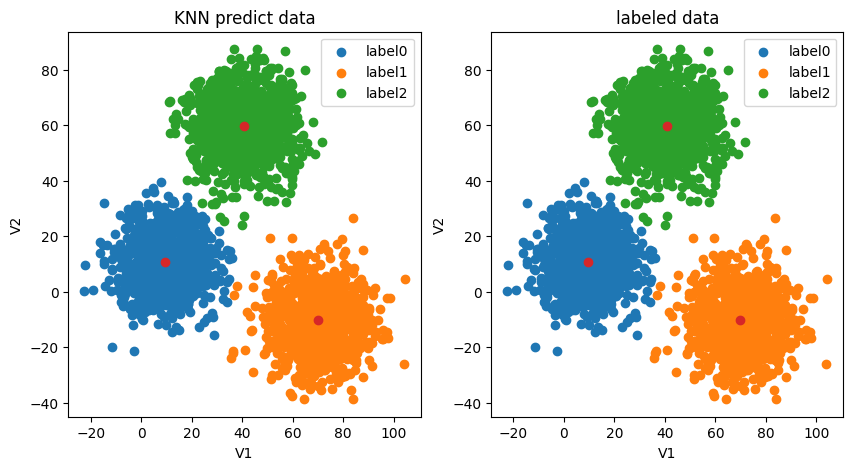

In [43]:
mask0 = y_predict_knn == 0
mask1 = y_predict_knn == 1
mask2 = y_predict_knn == 2

plt.figure(figsize=(10, 5))
fig8 = plt.subplot(1, 2, 1)
plt.title("KNN predict data")
label0 = plt.scatter(X.loc[:, "V1"][mask0], X.loc[:, "V2"][mask0])
label1 = plt.scatter(X.loc[:, "V1"][mask1], X.loc[:, "V2"][mask1])
label2 = plt.scatter(X.loc[:, "V1"][mask2], X.loc[:, "V2"][mask2])
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2
fig9 = plt.subplot(1, 2, 2)
plt.title("labeled data")
label0 = plt.scatter(X.loc[:, "V1"][mask0], X.loc[:, "V2"][mask0])
label1 = plt.scatter(X.loc[:, "V1"][mask1], X.loc[:, "V2"][mask1])
label2 = plt.scatter(X.loc[:, "V1"][mask2], X.loc[:, "V2"][mask2])
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()